# **Employees Future Predictions**

### We have a list of employers which has all the details of the employers including their education, joining date, payment tier, age, gender, everbenched, experienced, leave and not
### We have to create a model which can tell by looking at the pattern of this data which employers to keep and which employers to leave.

## importing library and modules

In [2]:
#import library
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics


In [1]:
# supress warning
import warnings
warnings.filterwarnings('ignore')

## Data Extraction

In [3]:
df = pd.read_csv('Employee.csv')   # import csv file

In [4]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
...,...,...,...,...,...,...,...,...,...
4648,Bachelors,2013,Bangalore,3,26,Female,No,4,0
4649,Masters,2013,Pune,2,37,Male,No,2,1
4650,Masters,2018,New Delhi,3,27,Male,No,5,1
4651,Bachelors,2012,Bangalore,3,30,Male,Yes,2,0


In [5]:
df.shape

(4653, 9)

in this data sets there are 4653 employeers recod and 9 columns 
first 8 columns feature variable and last has be target variable

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [7]:
df.describe()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
count,4653.000000,4653.000000,4653.000000,4653.000000,4653.000000
mean,2015.062970,2.698259,29.393295,2.905652,0.343864
std,1.863377,0.561435,4.826087,1.558240,0.475047
min,2012.000000,1.000000,22.000000,0.000000,0.000000
25%,2013.000000,3.000000,26.000000,2.000000,0.000000
50%,2015.000000,3.000000,28.000000,3.000000,0.000000
75%,2017.000000,3.000000,32.000000,4.000000,1.000000
max,2018.000000,3.000000,41.000000,7.000000,1.000000


lets see this employers data in range 2012 - 2018 joing date year

minimum and maximum age is (22 and 41)

minimum year of experience of employeers is 0 and the maximum year of experience of employers is 7

last LeaveOrNot is the target variable. is in only (0 and 1)

1 represent leave and 0 represent not

In [8]:
corr = df.corr()
corr

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot
JoiningYear,1.000000,-0.096078,0.013165,-0.036525,0.181705
PaymentTier,-0.096078,1.000000,0.007631,0.018314,-0.197638
Age,0.013165,0.007631,1.000000,-0.134643,-0.051126
ExperienceInCurrentDomain,-0.036525,0.018314,-0.134643,1.000000,-0.030504
LeaveOrNot,0.181705,-0.197638,-0.051126,-0.030504,1.000000


Text(0.5, 1.0, 'pearson correlation')

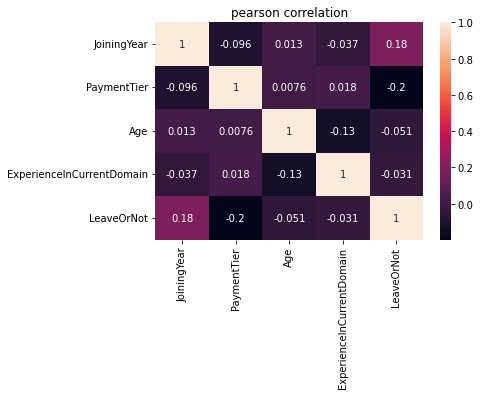

In [9]:
sns.heatmap(corr,  annot=True)
plt.title('pearson correlation')

## we check missing value

In [10]:
df.isnull().sum()

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

There are no missing values in this dataset

## Univariate analysis

In [11]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [12]:
# check education level of employers

df.Education.value_counts()   

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

<AxesSubplot:xlabel='Education', ylabel='count'>

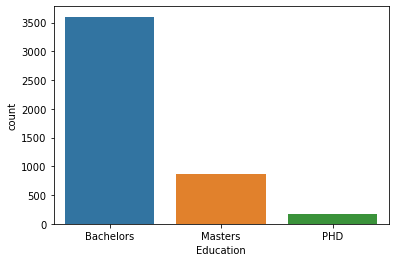

In [13]:
sns.countplot(df['Education'])

lets see bechelors degree employeers is more than other education

In [14]:
# check the highest joing year of employers
df.JoiningYear.value_counts()

2017    1108
2015     781
2014     699
2013     669
2016     525
2012     504
2018     367
Name: JoiningYear, dtype: int64

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

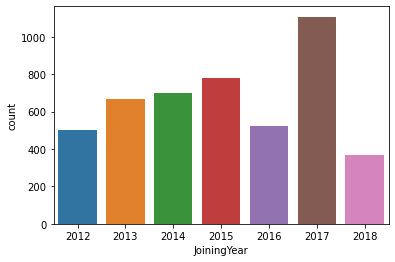

In [15]:
sns.countplot(df.JoiningYear)

let's see in 2017 highest joing of employers

In [16]:
# check the city 
df.City.value_counts()

Bangalore    2228
Pune         1268
New Delhi    1157
Name: City, dtype: int64

<AxesSubplot:xlabel='City', ylabel='count'>

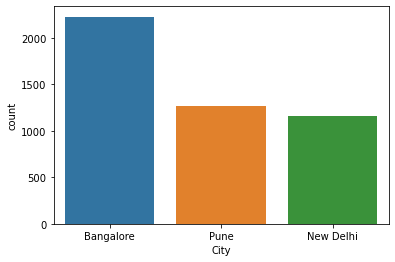

In [17]:
sns.countplot(df.City)

there are 3 city and more employers city is banglore

In [18]:
# Payment Tier
df.PaymentTier.value_counts()

3    3492
2     918
1     243
Name: PaymentTier, dtype: int64

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

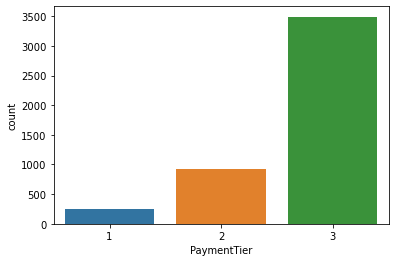

In [19]:
sns.countplot(df.PaymentTier)

In [20]:
# age 
df.Age.value_counts()

26    645
28    630
27    625
25    418
24    385
29    230
30    220
37    141
36    139
34    136
38    136
40    134
32    132
39    131
31    125
33    124
35    123
41     82
22     49
23     48
Name: Age, dtype: int64

<AxesSubplot:xlabel='Age', ylabel='count'>

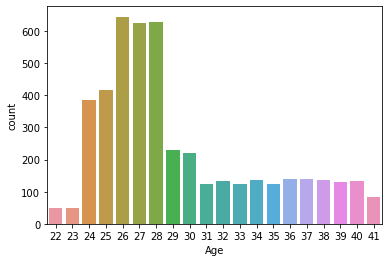

In [21]:
sns.countplot(df.Age)

lets see maximum number of employer age  b/w 24-28 year old

In [22]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

In [23]:
df.EverBenched.value_counts()

No     4175
Yes     478
Name: EverBenched, dtype: int64

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

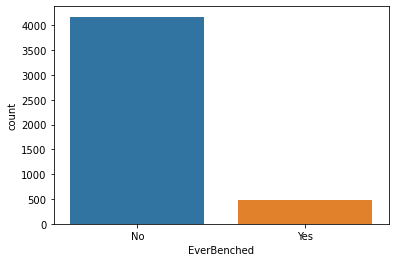

In [24]:
sns.countplot(df.EverBenched)

lets see approx 90% EverBenched value is NO

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

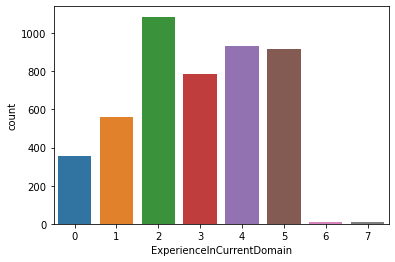

In [25]:
# check experience d level of employers
sns.countplot(df.ExperienceInCurrentDomain)

# EDA analysis

In [26]:
df.LeaveOrNot.value_counts()

0    3053
1    1600
Name: LeaveOrNot, dtype: int64

In [27]:
# we check how many percentage of employeers leave from organizations
Leave = (sum(df['LeaveOrNot'])/len(df['LeaveOrNot'].index))*100
Leave

34.38641736514077

## allmost 34 % employeer leave from organizations

In [28]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


<AxesSubplot:xlabel='Education', ylabel='count'>

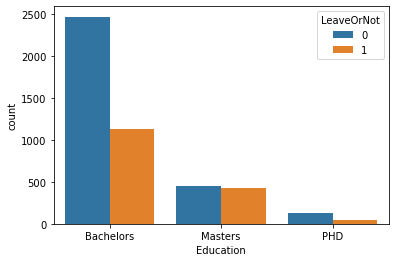

In [29]:
sns.countplot(x = 'Education', hue="LeaveOrNot", data=df)

lets see bechelors degree holder are mostly leave from orgnization

almost 50% employers with becholers degree has be leave from orgnization

<AxesSubplot:xlabel='JoiningYear', ylabel='count'>

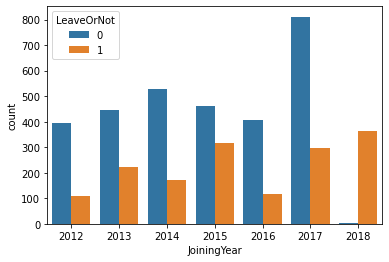

In [30]:
sns.countplot(data=df, x = 'JoiningYear', hue='LeaveOrNot')

joining year of employer in 2018 are mostly leave from orgnization 

<AxesSubplot:xlabel='City', ylabel='count'>

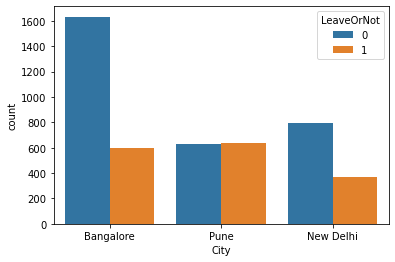

In [31]:
sns.countplot(data=df, x = 'City', hue='LeaveOrNot')

In [32]:
df.columns

Index(['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender',
       'EverBenched', 'ExperienceInCurrentDomain', 'LeaveOrNot'],
      dtype='object')

<AxesSubplot:xlabel='PaymentTier', ylabel='count'>

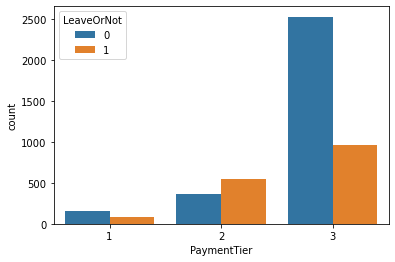

In [33]:
sns.countplot(data=df, x = 'PaymentTier', hue='LeaveOrNot')

<AxesSubplot:xlabel='Age', ylabel='count'>

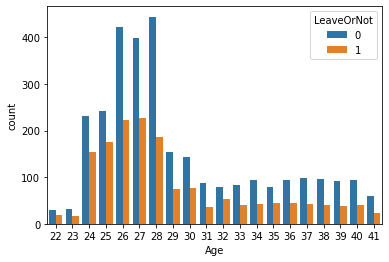

In [34]:
sns.countplot(data=df, x= 'Age', hue='LeaveOrNot')

lets see age b/w 24-28 of employer are mostly leave from orgnization

<AxesSubplot:xlabel='Gender', ylabel='count'>

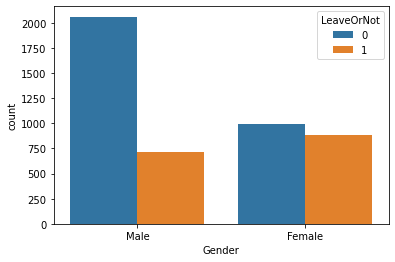

In [35]:
sns.countplot(data=df, x='Gender', hue='LeaveOrNot')

<AxesSubplot:xlabel='EverBenched', ylabel='count'>

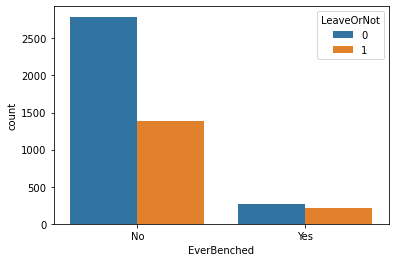

In [36]:
sns.countplot(data=df, x='EverBenched', hue='LeaveOrNot')

mostly NO everbenched employer are leave from the orgnizations

<AxesSubplot:xlabel='ExperienceInCurrentDomain', ylabel='count'>

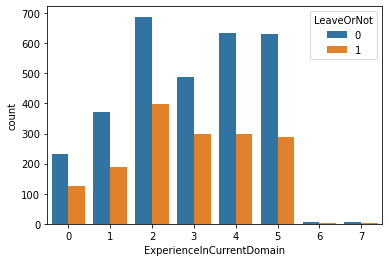

In [37]:
sns.countplot(data=df, x='ExperienceInCurrentDomain', hue='LeaveOrNot')

#  Data Preparation


Converting some binary variables (Yes/No) to 1/0

In [38]:
df.head()

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1


In [39]:
# replacing values
df['EverBenched'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

df['Gender'].replace(['Male', 'Female'],
                        [0, 1], inplace=True)


In [40]:
df.Education.value_counts()

Bachelors    3601
Masters       873
PHD           179
Name: Education, dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   int64 
 6   EverBenched                4653 non-null   int64 
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(7), object(2)
memory usage: 327.3+ KB


In [42]:
df.head(50)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,0,0,0,0
1,Bachelors,2013,Pune,1,28,1,0,3,1
2,Bachelors,2014,New Delhi,3,38,1,0,2,0
3,Masters,2016,Bangalore,3,27,0,0,5,1
4,Masters,2017,Pune,3,24,0,1,2,1
5,Bachelors,2016,Bangalore,3,22,0,0,0,0
6,Bachelors,2015,New Delhi,3,38,0,0,0,0
7,Bachelors,2016,Bangalore,3,34,1,0,2,1
8,Bachelors,2016,Pune,3,23,0,0,1,0
9,Masters,2017,New Delhi,2,37,0,0,2,0


In [43]:
df['Education'] = df['Education'].map({'Bachelors' : 0, 'Masters' : 1, 'PHD': 2})

In [44]:
df['City'] = df['City'].map({'Bangalore' : 0, 'Pune' : 1, 'New Delhi': 2})

In [45]:
df

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,0,2017,0,3,34,0,0,0,0
1,0,2013,1,1,28,1,0,3,1
2,0,2014,2,3,38,1,0,2,0
3,1,2016,0,3,27,0,0,5,1
4,1,2017,1,3,24,0,1,2,1
...,...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,1,0,4,0
4649,1,2013,1,2,37,0,0,2,1
4650,1,2018,2,3,27,0,0,5,1
4651,0,2012,0,3,30,0,1,2,0


In [46]:
df.dtypes

Education                    int64
JoiningYear                  int64
City                         int64
PaymentTier                  int64
Age                          int64
Gender                       int64
EverBenched                  int64
ExperienceInCurrentDomain    int64
LeaveOrNot                   int64
dtype: object

##  data has be cleaned 


# before feed data into model we are spliting the data into train and test

In [47]:
X = df.drop('LeaveOrNot', axis=1)
Y = df["LeaveOrNot"]

In [48]:
X

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,0,2017,0,3,34,0,0,0
1,0,2013,1,1,28,1,0,3
2,0,2014,2,3,38,1,0,2
3,1,2016,0,3,27,0,0,5
4,1,2017,1,3,24,0,1,2
...,...,...,...,...,...,...,...,...
4648,0,2013,0,3,26,1,0,4
4649,1,2013,1,2,37,0,0,2
4650,1,2018,2,3,27,0,0,5
4651,0,2012,0,3,30,0,1,2


# Convert data into standard scaler

In [49]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [52]:
X

array([[-0.50773115,  1.03963837, -0.93734426, ..., -0.82155097,
        -0.33836521, -1.86490139],
       [-0.50773115, -1.10723275,  0.28026122, ...,  1.21720992,
        -0.33836521,  0.06055412],
       [-0.50773115, -0.57051497,  1.49786671, ...,  1.21720992,
        -0.33836521, -0.58126438],
       ...,
       [ 1.41141834,  1.57635615,  1.49786671, ..., -0.82155097,
        -0.33836521,  1.34419112],
       [-0.50773115, -1.64395053, -0.93734426, ..., -0.82155097,
         2.95538654, -0.58126438],
       [-0.50773115, -0.03379719, -0.93734426, ..., -0.82155097,
         2.95538654,  0.70237262]])

In [53]:
x_cols = ['Education', 'JoiningYear', 'City', 'PaymentTier', 'Age', 'Gender', 'EverBenched', 'ExperienceInCurrentDomain']
X_std = pd.DataFrame(X, columns=x_cols)
X_std

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
0,-0.507731,1.039638,-0.937344,0.537503,0.954645,-0.821551,-0.338365,-1.864901
1,-0.507731,-1.107233,0.280261,-3.025177,-0.288732,1.217210,-0.338365,0.060554
2,-0.507731,-0.570515,1.497867,0.537503,1.783563,1.217210,-0.338365,-0.581264
3,1.411418,0.502921,-0.937344,0.537503,-0.495961,-0.821551,-0.338365,1.344191
4,1.411418,1.039638,0.280261,0.537503,-1.117650,-0.821551,2.955387,-0.581264
...,...,...,...,...,...,...,...,...
4648,-0.507731,-1.107233,-0.937344,0.537503,-0.703191,1.217210,-0.338365,0.702373
4649,1.411418,-1.107233,0.280261,-1.243837,1.576334,-0.821551,-0.338365,-0.581264
4650,1.411418,1.576356,1.497867,0.537503,-0.495961,-0.821551,-0.338365,1.344191
4651,-0.507731,-1.643951,-0.937344,0.537503,0.125727,-0.821551,2.955387,-0.581264


## Spliting the data into train and test data

In [54]:
# spliting data

X_train, X_test, Y_train, Y_test = train_test_split(X_std ,Y, test_size=0.2, random_state= 45)

print(X_train.shape)
print(X_test.shape)


(3722, 8)
(931, 8)


In [55]:
X_train

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain
2965,3.330568,-0.033797,1.497867,0.537503,-0.081502,-0.821551,-0.338365,0.702373
2774,1.411418,-1.107233,-0.937344,0.537503,0.125727,-0.821551,-0.338365,-1.223083
2711,-0.507731,-1.107233,-0.937344,0.537503,-0.081502,-0.821551,-0.338365,-1.223083
147,-0.507731,0.502921,0.280261,0.537503,-0.288732,-0.821551,-0.338365,-1.223083
2690,-0.507731,1.576356,-0.937344,0.537503,-0.081502,-0.821551,2.955387,-0.581264
...,...,...,...,...,...,...,...,...
3704,-0.507731,1.039638,0.280261,0.537503,2.405251,1.217210,-0.338365,0.702373
4473,3.330568,-0.033797,0.280261,-1.243837,1.161875,1.217210,-0.338365,-1.864901
580,1.411418,-0.033797,1.497867,0.537503,-0.288732,1.217210,2.955387,-0.581264
163,-0.507731,0.502921,-0.937344,0.537503,-0.910420,-0.821551,-0.338365,0.060554


In [56]:
scores = []
clfs = [DecisionTreeClassifier(class_weight='balanced', random_state=42), 
        RandomForestClassifier(class_weight='balanced', random_state=42), 
        KNeighborsClassifier(n_neighbors=3), GaussianNB(), SVC(random_state=42)]



In [57]:
from sklearn.metrics import accuracy_score, make_scorer, recall_score, f1_score

In [58]:
for clf in clfs:
  # Extracting model name
  model_name = type(clf).__name__

  # Fit the model on train data
  clf.fit(X_train, Y_train)

  # Make predictions using test data
  Y_pred = clf.predict(X_test)

  # Make predictions using train data
  Y_train_pred = clf.predict(X_train)

  # F1 on train set
  s1_train = accuracy_score(Y_train, Y_train_pred)

  # F1 on test set
  s1_test = accuracy_score(Y_test, Y_pred)

  # Display the accuracy of the model
  print('Performance Metrics for', model_name, ':')

  print('[accuracy_score Train]:', s1_train)

  print('[accuracy_score Test]:', s1_test)
  print('--------------------\n')

  scores.append((model_name, s1_train,s1_test))

Performance Metrics for DecisionTreeClassifier :
[accuracy_score Train]: 0.9296077377753896
[accuracy_score Test]: 0.7873254564983888
--------------------

Performance Metrics for RandomForestClassifier :
[accuracy_score Train]: 0.929876410531972
[accuracy_score Test]: 0.8302900107411385
--------------------

Performance Metrics for KNeighborsClassifier :
[accuracy_score Train]: 0.876410531972058
[accuracy_score Test]: 0.799140708915145
--------------------

Performance Metrics for GaussianNB :
[accuracy_score Train]: 0.6802794196668458
[accuracy_score Test]: 0.6799140708915145
--------------------

Performance Metrics for SVC :
[accuracy_score Train]: 0.8516926383664697
[accuracy_score Test]: 0.8356605800214822
--------------------



In [59]:
models = pd.DataFrame(data=scores, columns=['Model', 'Train score1', 'Test score1'])
models

,Model,Train score1,Test score1
0,DecisionTreeClassifier,0.929608,0.787325
1,RandomForestClassifier,0.929876,0.830290
2,KNeighborsClassifier,0.876411,0.799141
3,GaussianNB,0.680279,0.679914
4,SVC,0.851693,0.835661


In [60]:
models[['Model','Test score1']].sort_values(by='Test score1', ascending=False)

,Model,Test score1
4,SVC,0.835661
1,RandomForestClassifier,0.830290
2,KNeighborsClassifier,0.799141
0,DecisionTreeClassifier,0.787325
3,GaussianNB,0.679914


# lets RandomForestClassifier and SVC is the best classifier it gives higher accuracy no futher improve accuracy we use hyperparameter tunning of RandomForestClasssifier 